# Power Calculations and Experiment Planning

When you read about them in a book, power calculations can feel very abstract. To make the concept more concrete, and to give you a chance to familiarize yourself with power calculation tools and the considerations that go into power calculations, in this exercise you will play the role of an experiment planner hired by a Non-Governmental Organization (NGO) named [Bandhan](https://www.bandhan.org/) in West Bengal, India. Bandhan is planning to roll out a program that provides livestock, cash, and some basic training to households in extreme poverty. They hope to demonstrate the value of cash and asset transfers, and so wish their program to take the form of a randomized experiment, with data being collected on both control and treatment households.

Your job will be to help them estimate how many households they should enroll in the program.

This was, in fact, a real program, and so the data you will be working with comes from the actual program (conducted in 2007, with followup data collection in 2010, 2017, and 2020), allowing us to do some retrospective comparison of your power calculations and what actually occurred.

## The Context

> Development economics has long posited that the poor may be poor for no good reason other than the fact that they started poor. This is the idea of a poverty trap, which has the implication that a one-time capital grant that makes very poor households significantly less poor ("big push") might set off a virtuous cycle that takes them out of poverty. Forty-three countries now embrace some version of this idea and make large transfers to over 3.1 million of their poorest households. In particular, the "Targeting the Ultra Poor" (TUP) intervention, pioneered by BRAC in Bangladesh, employs a multifaceted approach, offering poor households an asset transfer, consumption support, savings, and training in the hopes of unlocking a poverty trap.

- [*Long-Term Effects of the Targeting the Ultra Poor Program*](https://economics.mit.edu/sites/default/files/inline-files/aeri.20200667.pdf), Abhijit Banerjee, Esther Duflo, and Garima Sharma, 2021.

In 2007, Bandhan in West Bengal, India created a pilot program to provide direct, unconditional transfers of productive livestock and a 30 or 40 week stipend of 90 rupees a week (about 7 US dollars a week using the [Purchasing Power Parity (PPP)](https://en.wikipedia.org/wiki/Purchasing_power_parity) exchange rate). The program targeted the poorest households in these villages based on range of criteria, and the average eligible household was later estimated to have a consumption level of about 1.35 2018 US Dollars per capita per day in PPP terms $.^1$

Because the goal of the program was, in significant part, to demonstrate the effect of direct asset transfers, Bandhan identified twice as many eligible households as it could support in the pilot and randomly selected half of the households to act as controls and half to be treated $.^2$ Treated households were offered assets from a menu of options, from the most common choice was productive livestock (e.g., cows and goats). $^3$ Bandhan's contact with the households came to an end 18 months after the households were initially provided their livestock and cash transfers began.

Although data was collected on a huge range of attributes of the households in this program, our focus will be on per capita household expenditures in 2018 US Dollars (PPP). 

(Note that these households certainly were not buying their food with dollars, and in most cases they weren't even buying most of their food with rupees — consumption estimates in this type of study are calculated by collecting detailed data on what household members have consumed in the past week, then estimating the price one would pay to buy those goods in local markets and using [PPP conversion rates](https://en.wikipedia.org/wiki/Purchasing_power_parity) conversion rates to convert that into US Dollars).



## Gradescope Autograding

Please follow [all standard guidance](https://www.practicaldatascience.org/ids720_specific/autograder_guidelines.html) for submitting this assignment to the Gradescope autograder, including storing your solutions in a dictionary called `results` and ensuring your notebook runs from the start to completion without any errors.

For this assignment, please name your file `exercise_power_calculations.ipynb` before uploading.

You can check that you have answers for all questions in your `results` dictionary with this code:

```python
assert set(results.keys()) == {
    "ex2_baseline_percap_expend_mean",
    "ex2_baseline_percap_expend_std",
    "ex4_obs_needed",
    "ex5_effect_size_34",
    "ex5_treated_34",
    "ex6_treated_notchance",
    "ex7_constrained_mde",
    "ex9_true_effect",
    "ex10_ratio",
    "ex10_standardized_effect",
    "ex11_power_35",
    "ex12_avg_effect",
    "ex12_reject_rate",
    "ex13_analytic_power",
    "ex13_bootstrapped_power",
}
```

### Submission Limits

Please remember that you are **only allowed THREE submissions to the autograder.** Your last submission (if you submit 3 or fewer times), or your third submission (if you submit more than 3 times) will determine your grade Submissions that error out will **not** count against this total.


## Part 1: Power Calculations

### Exercise 1

Load a thinned version of household-level survey data from [Banerjee, Duflo, and Sharma (2021)'s](https://economics.mit.edu/research/publications/long-term-effects-targeting-ultra-poor-program) evaluation of the Bandham program [here](https://github.com/nickeubank/MIDS_Data/tree/master/cash_transfers). 

This is just a version of the replication data for that paper ([which can be found here](https://www.openicpsr.org/openicpsr/project/130362)) with only the variables that are relevant for our analysis.

In [18]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)

url = "https://github.com/nickeubank/MIDS_Data/raw/refs/heads/master/cash_transfers/TUP_cash_transfers.csv"

df = pd.read_csv(url)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   treatment         978 non-null    int64  
 1   pc_exp_month_bl   978 non-null    float64
 2   pc_exp_month_el1  811 non-null    float64
 3   pc_exp_month_el2  867 non-null    float64
 4   pc_exp_month_el3  864 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 38.3 KB


### Exercise 2

The first step in doing any power calculations is to establish an estimate of the baseline level of variation that exists in the dependent variable you wish to study. In this case, that variable is Per Capita Monthly Expenditures, and the baseline survey values of expenditures are in `pc_exp_month_bl` (the `_bl` stands for "baseline", meaning this data was collected prior to any households receiving asset transfers and indeed any households being assigned to treatment or control).

What is the mean and standard deviation of `pc_exp_month_bl` in the baseline survey? 

Store the average baseline monthly per capita expenditure in your `results` dictionary under `ex2_baseline_percap_expend_mean` and the standard deviation of this statistic under `ex2_baseline_percap_expend_std`. Do **not** round these numbers — we'll use their full value repeatedly in this exercise.

(Monthly expenditure may feel a little abstract, so also divide by 30 to confirm our average household has the expected per capita expenditure level of about US Dollar 1.35 (PPP) a day. You don't have to save this result.)

In [2]:
results = {}

results["ex2_baseline_percap_expend_mean"] = df["pc_exp_month_bl"].mean()
results["ex2_baseline_percap_expend_std"] = df["pc_exp_month_bl"].std()

print(f"Mean: {results['ex2_baseline_percap_expend_mean']}")
print(f"Std: {results['ex2_baseline_percap_expend_std']}")
print(f"Daily expenditure: {results['ex2_baseline_percap_expend_mean'] / 30}")

Mean: 40.736776763087924
Std: 24.262248052211223
Daily expenditure: 1.3578925587695976


### Exercise 3

For these exercises, we'll use the `power` module in `statsmodels` to do our power calculations. [You can read more about it here.](https://www.statsmodels.org/stable/stats.html#power-and-sample-size-calculations) Basically, this package just offers some convenience functions for doing the [standard analytic power calculations](https://en.wikipedia.org/wiki/Power_(statistics)#Analytic_solution) you've read about.

Since we're comparing means in a continuous variable (expenditures) from two samples of households, we will use `TTestIndPower` in `statsmodels.stats.power`. Import this class and instantiate a new instance (for some reason this is class based, so you have to start of with a command like `my_power = TTestIndPower()`). 

Note that a common situation in data science is testing a difference in *proportions* between groups (e.g., across treatment arms). This situation arises when your dependent variable is binary, and so each group's mean is just the share of observations for whom the binary variable is 1. This comes up a lot with apps and websites — e.g., "clicked an ad," "subscribed," "made a purchase." 

For that reason, there's actually a full sub-class of power calculating tools for [proportions you should be aware of.](https://www.statsmodels.org/stable/stats.html#proportion) Basically, because the standard deviation of a binary variable is just $\sqrt{p * (1-p)}$, power calculations become really simple. For example, you may wish to identify the sample size required to get confidence intervals of a given size using a tool like [confint_proportions_2indep](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.confint_proportions_2indep.html#statsmodels.stats.proportion.confint_proportions_2indep).

But the most common use of a power test remains evaluating whether one can reject a null hypothesis of no effect, so we'll start with that here.

In [3]:
from statsmodels.stats.power import TTestIndPower

my_power = TTestIndPower()

### Exercise 4

[TTestIndPower has three methods](https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestIndPower.html#statsmodels.stats.power.TTestIndPower) — `plot_power`, `solve_power`, and `power`. `solve_power` does everything `power` does, though, so really there are two methods.

The idea of `solve_power` is that you give it all three of the four parameters that go into the power formula — minimum detectable effect, number of observations, power, and p-value $\alpha$ threshold — and it will solve for the omitted variable.

To get a quick flavor for how this works, set: 

- Minimal Detectable Effect (`effect_size`) to `0.5` (we'll take about the units of that argument soon), 
- `alpha` to `0.05`, 
- `ratio` to `1` (this is the ratio of between the number of observations being treated and the number in control — in this study, the target was to have these be equal, as that provides the best statistical power for a given total number of observations).
- `power` to `0.8`
- `alternative` to `two-sided` (we want to do a two-tailed t-test, as you could imagine social unrest caused by transfers could make people worse off).
- `nobs1` to `None`. By passing `None`, we're telling `solve_power` this is the quantity we want it to solve for.

So in other words, we're asking:

- how many observations do we need to have in the treatment arm,
- assuming we'll have the same number also in the control arm,
- to have an 80% chance
- of rejecting the null hypothesis of no-effect at a significance threshold of 0.05
- if the true effect is of size 0.5?

What's the answer?

Round your answer to the nearest integer and save it in `results` as `ex4_obs_needed`.

In [4]:
nobs_required = my_power.solve_power(
    effect_size=0.5, alpha=0.05, power=0.8, ratio=1, alternative="two-sided", nobs1=None
)

results["ex4_obs_needed"] = round(nobs_required)

print(f"Observations needed per group: {results['ex4_obs_needed']}")

Observations needed per group: 64


### Exercise 5

Of all these quantities, perhaps the most obscure is the Minimal Detectable Effect (`effect_size`). What is this 0.5? Where did it come from? And how did you do all that without telling it that standard deviation you had me calculate?

If you check the docs for `solve_power`, you'll see that you're supposed to pass `effect_size` the "standardized effect size, difference between the two means divided by the standard deviation. `effect_size` has to be positive."

In other words, when we passed 0.5, we weren't saying we wanted to be able to detect an effect of 0.5 2018 US Dollars (PPP) per capita per month, we were saying we wanted to detect an effect of 1/2 standard deviation. 

Given the standard deviation in our baseline survey was about 24 Dollars, that means we were saying we wanted to detect an effect size of about 12 US Dollars. 

Does that feel like a lot? The average per capita monthly expenditures in the baseline survey was about 41 Dollars, so it's an increase in expenditures of about 25%. So it's certainly pretty big in proportion to the baseline level of expenditures. But whether it's a "lot" is actually not a technical question, it's a substantive one.

The idea of a Minimal Detectable Effect is to pick the smallest effect size that you'd care about detecting. That way if the true effect *is* the MDE, then when you reject the null you'd want to take some kind of action based on the result (e.g., scale up the program). And if the true effect is smaller, you'd be ok with your inability to reject the null hypothesis since the effect is small enough you wouldn't want to change what you're doing (e.g., you *wouldn't* want to scale up the program).

If you set the MDE too high, you may run an under-powered experiment where you miss out on learning that your treatment was effective; if you set the MDE too low, you're spending time and money collecting more data than is necessary given you might reject the null at a point estimate where you still wouldn't scale up the treatment.

So what value makes sense here? That's a question you'd want to start off by asking the stakeholders. Since Bandhan wants to use this to convince international donors and governments to support cash transfer programs, they probably need the effect to be relatively large to be convincing.

Let's assume that, three years after the intervention, they feel they need to show that incomes have increased by at least 34%.

What value does that imply should be passed to `effect_size`? What is the new implied number of treated households they'll need? How many households total?

Store the new MDE you would pass to `effect_size` in `results` under `ex5_effect_size_34`, and the new number of houses you'd need to put in the treatment group under `ex5_treated_34` **rounded to the nearest integer**.

In [5]:
# Calculate effect size for a 34% increase in per capita expenditure
mu0 = results["ex2_baseline_percap_expend_mean"]
sd0 = results["ex2_baseline_percap_expend_std"]

delta_34 = 0.34 * mu0
effect_size_34 = delta_34 / sd0
results["ex5_effect_size_34"] = effect_size_34

print(f"Effect size for 34% increase: {results['ex5_effect_size_34']}")

# Calculate the number of observations needed for a 34% increase
nobs_required_34 = my_power.solve_power(
    effect_size=effect_size_34,
    alpha=0.05,
    power=0.8,
    ratio=1,
    alternative="two-sided",
    nobs1=None,
)

results["ex5_treated_34"] = round(nobs_required_34)

print(f"Observations needed per group for 34% increase: {results['ex5_treated_34']}")

Effect size for 34% increase: 0.5708664782275845
Observations needed per group for 34% increase: 49


### Exercise 6

Because Bandhan really wants to sell their result, suppose they also want to ensure no one claims it might have arisen by chance. 

What parameter should they adjust, and in what direction? 

Try modifying the relevant parameter by a factor of 2 (so either double the parameter or halve it, depending on the direction you think it should change). Can you predict what the change in the number of observations you will be before you do it?

Store the new number of observations that need to be treated in `results` under the key `"ex6_treated_notchance"`. As before, round the number of households needed to nearest integer.

In [6]:
alpha_new = 0.05 / 2

nobs_required_notchance = my_power.solve_power(
    effect_size=effect_size_34,
    alpha=alpha_new,
    power=0.8,
    ratio=1,
    alternative="two-sided",
    nobs1=None,
)

results["ex6_treated_notchance"] = round(nobs_required_notchance)

print(
    f"Observations needed per group for 34% increase with new alpha: {results['ex6_treated_notchance']}"
)

Observations needed per group for 34% increase with new alpha: 60


### Exercise 7

Now suppose that your stakeholder is budget constrained to only being able to enroll a total of 100 (50 in each arm). Assuming an alpha of `0.05` and a power of `0.8`, what is their minimal detectable effect size (in dollars)? Store your result under the key `"ex7_constrained_mde"`.

In [7]:
effect_size_needed = my_power.solve_power(
    nobs1=50, ratio=1, alpha=0.05, power=0.8, alternative="two-sided", effect_size=None
)

mde_dollars = effect_size_needed * sd0

results["ex7_constrained_mde"] = mde_dollars

print(
    f"Minimum detectable effect in dollars with 50 observations per group: {results['ex7_constrained_mde']}"
)

Minimum detectable effect in dollars with 50 observations per group: 13.729528146522165


### Exercise 8

Suppose your stakeholder wants to see a few different scenarios to see how different experiment sizes would impact power given different effect sizes. Let's use `plot_power`. Pass it an array of treatment arm observation counts you want evaluated (I'd recommend `np.arange()`) between 20 and 100, along with effect sizes of 0.2, 0.4, and 0.6 (again, use `np.arange()`).

If the stakeholder decided they wanted power above 90% — they're only gonna get a chance to do this once, after all! — what kind of sample size would they need with a minimal detectable effect size of 0.6? (Approximately).

You may need to check the docs to figure out how to use it.

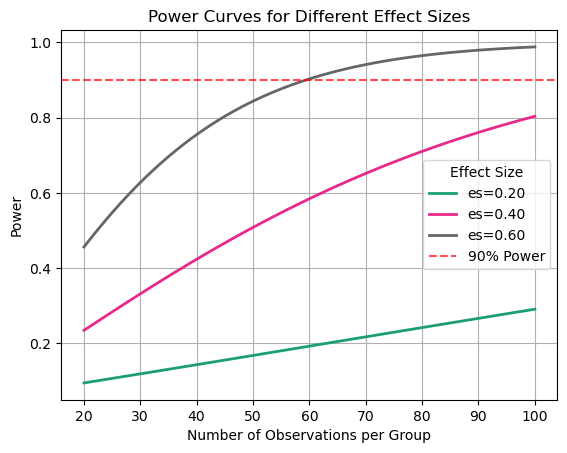

In [8]:
import matplotlib.pyplot as plt
import numpy as np

n_range = np.arange(20, 101)
effect_sizes = np.array([0.2, 0.4, 0.6])

my_power.plot_power(
    dep_var="nobs",
    nobs=n_range,
    effect_size=effect_sizes,
    alpha=0.05,
    ratio=1,
    alternative="two-sided",
)

plt.title("Power Curves for Different Effect Sizes")
plt.xlabel("Number of Observations per Group")
plt.ylabel("Power")
plt.axhline(y=0.9, color="red", linestyle="--", alpha=0.7, label="90% Power")
plt.legend(title="Effect Size")
plt.grid()
plt.show()

When effect_size = 0.6, approximately 60 nobs1 (treatment group) are needed for power > 0.9

## Part 2: How Good Are These Guesses?

The biggest challenge with power calculations like these is that they are subject to lots of source of uncertainty. It's not just that power itself is a probabilistic concept (recall power is the *probability* you will the true effect is precisely the minimimal detectable effect you specified); the problem is that we are using estimates of population parameters as inputs to these calculations and formulas based on distributional assumptions. For example:

1. We are *estimating* the true population mean from a sample of observations,
2. We are *estimating* the true population standard deviation from a sample of observations,
3. Our models *assume* our outcomes variables are normally distributed (i.e. modelling uncertainty).

Of course, as our sample size gets larger, each of these assumptions becomes less of a problem — the uncertainty in our estimates of the population mean and standard deviation will shrink and t-tests become robust to outcomes that are not normally distributed when samples become large enough (i.e., t-tests are asymptotically robust to outcomes that are not normal since the sampling distribution of the *mean* of a population converges to normal thanks to the Central Limit Theorem).

But all three of these mean that there's substantial uncertainty underlying these apparently clean predictions. 

Most people never pause to reflect on this. You run a power calculation, it tells you the probability you'd reject the null if you had a Minimal Detectable Effect of a given value, and you use these values to plan an experiment. You run the experiment, and you get a result. And by that point you've largely forgotten about your power calculation and are focused on the results you now have. 

In the case of this study (Bandhan), because we have data from the final survey result, we can use the experiment's results to do some simulations to see how things may have turned out in different situations. Moreover, because the actual experiment — as run in West Bengal — was quite overpowered (they had a lot more observations than they needed to reject the null at standard levels), we have a reasonably precise estimate of the true effect size, which is important to make this work. 

To reiterate: what we're now doing is a kind of "after-action report" / post-mortem on our power calculations. Everything we do below relies on the results of the experiment, which you (and the Bandhan team) would obviously not have had at the time you were doing your power calculations. This is the kind of thing we can only do *after* an experiment has been run, and its value is largely to help you think about uncertainty in power calculations the next time you're doing power calculations.

### Exercise 9

The data we used for our power calculations above came from a baseline survey done before anyone received cash transfers. It's the kind of data collection and analysis you do *before* launching an experiment to help determine how big a sample you need in your experiment.

But because this team *did* run their cash transfer experiment, we have access to data on how things turned out. In particular, the variables in this data with the suffix `_el3` (short for "end-line 3") are results from surveys collected 7 years after households received their first cash transfers. 

With that in mind, we will treat the difference in `pc_exp_month_el3` between the `treatment == 1` and `treatment == 0` groups as the "true" effect of the experiment. Technically this is an estimated quantity, so there is some uncertainty around this estimate, but the standard error of the estimate of the effect size is ~1/6 of the effect size, the precision is good enough we can "pretend" it's the true effect size for our purposes (especially given what comes next).

Calculate what we will call the "true" effect of the experiment (avg difference in `pc_exp_month_el3` between treatment and control). Store this as `ex9_true_effect`. 


In [9]:
el3 = df[["pc_exp_month_el3", "treatment"]].dropna()

true_effect = (
    el3[el3["treatment"] == 1]["pc_exp_month_el3"].mean()
    - el3[el3["treatment"] == 0]["pc_exp_month_el3"].mean()
)

results["ex9_true_effect"] = true_effect

print(f"True effect: {results['ex9_true_effect']}")

True effect: 17.869312190825184


### Exercise 10

Now let's calculate the statistical power the Bandham team may have anticipated if they had known this was the true effect size. 

Use the value from exercise 9 as the Minimal Detectable Effect we want to identify, but otherwise do all our calculations the way we would if we hadn't run the experiment yet. So when you convert our effect size into "effect in standard deviations," use the standard deviation we calculated at baseline for the normalization. Then use the real number of observations in treatment, and the real ratio of people in treatment and control for whom we have valid observations of `pc_exp_month_el3`.

Store the ratio of the number of control observations to number of treatment observations you pass to `ratio` under `"ex10_ratio"`, your standardized effect size under `"ex10_standardized_effect"`.

That value of power you get back is, given this effect size and the number of observations in the study, the probability the team would be able to reject the null hypothesis of no effect at alpha=0.05.

In [10]:
n_t = (el3.treatment == 1).sum()
n_c = (el3.treatment == 0).sum()
ratio = n_c / n_t

std_eff = results["ex9_true_effect"] / results["ex2_baseline_percap_expend_std"]

pwr = my_power.solve_power(
    effect_size=std_eff, alpha=0.05, nobs1=n_t, ratio=ratio, alternative="two-sided"
)

results["ex10_ratio"] = ratio
results["ex10_standardized_effect"] = std_eff

print(f"Control to treatment ratio: {results['ex10_ratio']}")
print(f"Standardized effect size: {results['ex10_standardized_effect']}")
print(f"Power of the test: {pwr}")

Control to treatment ratio: 0.9030837004405287
Standardized effect size: 0.736506862528619
Power of the test: 1.0


### Exercise 11

What would the power be if Bandhan had only enrolled 35 households per arm with a 1:1 ratio? Store as `ex11_power_35`. Don't round your answer.


In [11]:
pwr_35 = my_power.solve_power(
    effect_size=std_eff, alpha=0.05, nobs1=35, ratio=1, alternative="two-sided"
)

results["ex11_power_35"] = pwr_35

print(f"Power of the test with 35 observations per group: {results['ex11_power_35']}")

Power of the test with 35 observations per group: 0.859321008001562


### Exercise 12

The idea of the "power" of a test is that, when we draw a sample from a population, there's some variation in who happens to end up in that sample. Consequently, even if the *true* effect size in the population is equal to our Minimal Detectable Effect, there's some probability that when we compare treated and untreated outcomes for the $N$ people who actually end up in the study, that Minimal Detectable Effect may not be evident in that sample (at the level of statistical significance $\alpha$ we have chosen).

Given that, one way to think of power is: "If the true effect in the population is our Minimal Detectable Effect, then if I were able to re-run this experiment over and over — drawing new people into the study and testing the difference in outcomes between the control and treated sample each time — then in what percentage of those instances of the experiment would I reject the null hypothesis of no effect?" Power of 80% means that we'd expect to reject the null of no effect in 80% of those many experiments.

Well, we can basically do that thought experiment with this data! 

To do the experiment you did the power calculations for in Exercise 11, we just need to sample 35 observations from the treated group and 35 from the control group, treat that as our experimental sample, and estimate the difference in per capita month expenditures between those two groups (along with the associated p-value).

Then we can repeat that over and over to simulate "re-running" the experiment, each time drawing a new sample of 35 treated observations and 35 control observations. Then we can store the p-values from all these "re-run" experiments and see how often we reject the null of no effect!

Two small details for the autograder:

- When drawing your sample of 35 observations, draw from observations for which `pc_exp_month_el3` is not missing.
- In your t-test, please use equal variance t-test. 

There are arguments for both strategies in this context, but for the autograder is just important we all do the same thing.

Note that when you do this experiment, we have to sample our 35 observations from each treatment arm *with replacement*, just as you would when bootstrapping (this is basically a version of bootstrapping). 

So: write a loop where, on each pass, you draw 35 observations (with replacement) from treatment and 35 from control, then calculate the treatment effect and p-value for that sample. 

**Repeat this 20,000 times**

In what share of cases would you reject the null of no effect at alpha = 0.05 (two-tailed)?

Store your rejection rate under the key `"ex12_reject_rate"` and estimated average effect under `"ex12_avg_effect"`.

Round your estimate of the rejection rate to two decimal places (i.e., the nearest percentage point) and effect size to the nearest integer (i.e., no decimal places).

In [12]:
from scipy import stats

treated_vals = el3.loc[el3.treatment == 1, "pc_exp_month_el3"].to_numpy()
control_vals = el3.loc[el3.treatment == 0, "pc_exp_month_el3"].to_numpy()

B = 20_000
n = 35

pvals = np.empty(B)
effects = np.empty(B)

rng = np.random.default_rng(seed=42)

for _ in range(B):
    treated_sample = rng.choice(treated_vals, size=n, replace=True)
    control_sample = rng.choice(control_vals, size=n, replace=True)

    effects[_] = treated_sample.mean() - control_sample.mean()
    pvals[_] = stats.ttest_ind(treated_sample, control_sample, equal_var=True).pvalue

reject_rate = (pvals < 0.05).mean()

results["ex12_reject_rate"] = round(reject_rate, 2)
results["ex12_avg_effect"] = int(round(effects.mean(), 0))

print(f"Reject rate: {results['ex12_reject_rate']}")
print(f"Average effect from bootstrap samples: {results['ex12_avg_effect']}")

Reject rate: 0.42
Average effect from bootstrap samples: 18


### Exercise 13

Repeat exercises 11 and 12 with 50 treated observations and 50 untreated. 

For the analytic power calculations, use the same standardized effect size from Ex 10 and a ratio of 1:1.

Store the power from your analytic calculations using `statsmodels` under `"ex13_analytic_power"` and your real-data simulated result as `"ex13_bootstrapped_power"`.

Do not round your answer to `"ex13_analytic_power"`.

Round your answer for `"ex13_bootstrapped_power"` to one decimal places (i.e., nearest 10 percentage points — the real answer is around a .5 cut point, so rounding to nearest decimal goes back and forth, and that annoys the autograder).

In [13]:
# Calculate analytic power with 50 observations per group
power_analysis = my_power.solve_power(
    effect_size=std_eff, alpha=0.05, nobs1=50, ratio=1, alternative="two-sided"
)

results["ex13_analytic_power"] = power_analysis

print(
    f"Analytic power with 50 observations per group: {results['ex13_analytic_power']}"
)

# Bootstrap power calculation with 50 observations per group
B = 20_000
n = 50

pvals = np.empty(B)

rng = np.random.default_rng(seed=42)

for _ in range(B):
    treated_sample = rng.choice(treated_vals, size=n, replace=True)
    control_sample = rng.choice(control_vals, size=n, replace=True)

    pvals[_] = stats.ttest_ind(treated_sample, control_sample, equal_var=True).pvalue

bootstrap_power = (pvals < 0.05).mean()

results["ex13_bootstrapped_power"] = round(bootstrap_power, 1)

print(
    f"Bootstrapped power with 50 observations per group: {results['ex13_bootstrapped_power']}"
)

Analytic power with 50 observations per group: 0.9541260056964032
Bootstrapped power with 50 observations per group: 0.5


### Exercise 14

What can you conclude from these results? The next time you are asked to do power calculations, how will these results shape your thinking?

(Note: if you want to try and get a better sense of exactly why you are getting the results you're getting, compare the standard deviation of expenditures in `el3` to the standard deviation in baseline expenditures).

In [14]:
sd_bl = df["pc_exp_month_bl"].std(ddof=1)
sd_el3 = df["pc_exp_month_el3"].std(ddof=1)
sd_bl, sd_el3, sd_el3 / sd_bl

(np.float64(24.262248052211223),
 np.float64(46.63909044002053),
 np.float64(1.9222905618496435))

In [15]:
sd_el3 = el3["pc_exp_month_el3"].std(ddof=1)
std_eff_el3 = true_effect / sd_el3

analytic_power_fixed = my_power.power(
    effect_size=std_eff_el3, nobs1=50, ratio=1, alpha=0.05
)
analytic_power_fixed

np.float64(0.47492128540314127)

These results show that analytic power calculations are highly sensitive to how the effect size is standardized. My initial analytic power (≈0.95) was inflated because I standardized the endline-3 treatment–control mean difference using the baseline standard deviation, which understates the variability of endline-3 expenditures and therefore overstates the standardized effect size. In contrast, the bootstrap directly resamples the empirical endline-3 outcome distribution and runs the t-test each time, so it naturally reflects the higher endline-3 variability, yielding an empirical power of about 0.50.

The discrepancy is explained by the fact that the endline-3 standard deviation (≈46.64) is almost twice the baseline standard deviation (≈24.26), i.e., sd_el3/sd_bl ≈ 1.92. Once I re-standardized the effect using the endline-3 SD, the analytic power dropped to ≈0.47, which closely matches the bootstrapped estimate (~0.50). This indicates the gap was driven primarily by a mismatch in the variance used for standardization rather than a failure of the analytic method.

Going forward, these results will shape my approach to power calculations in three ways: (1) I will ensure the SD used for standardization matches the outcome and time period of interest (e.g., endline SD for endline outcomes); (2) I will perform sensitivity analyses over plausible ranges of effect sizes and variances; and (3) when distributional assumptions may be questionable (heavy tails, heteroskedasticity, outliers), I will use simulation-based checks (bootstrap/Monte Carlo) to validate analytic power calculations, using the effective sample size after accounting for missingness.

## Footnotes

1. The poorest households were identified in two steps. First, residents across 120 village hamlets ranked households into five wealth quintiles. Among households ranked in the bottom quintile, Bandhan then verified eligibility per seven criteria: (i) presence of an able-bodied female member (to manage the asset), (ii) no credit access, (iii) landholding below 0.2 acres, (iv) no ownership of productive assets, (v) no able-bodied male member, (vi) presence of school-aged children who were working instead of attending school, and (vii) primary source of income being informal labor or begging. Households had to meet the first two criteria and at least three of the remaining five in order to be eligible for the TUP intervention.
2. The [ethics of randomization in these types of programs](https://www.povertyactionlab.org/resource/ethical-conduct-randomized-evaluations) is subject of a rich literature, and there are currently an extensive set of guidelines used by researchers developing these types of programs.
3. Of the 514 offered the livestock and cash transfers, only 266 accepted. The treatment estimates that follow are thus estimates of the effect of *offering* these transfers. Households that accepted the offers might differ systematically from those that do not, so the study simply compares those *offered* the transfer to those who did not). This is what's called an estimate of the "intention to treat" effect, and is thus *likely* an under-estimate of the effect of cash transfers that would be observed if uptake were greater.

In [16]:
results

{'ex2_baseline_percap_expend_mean': np.float64(40.736776763087924),
 'ex2_baseline_percap_expend_std': np.float64(24.262248052211223),
 'ex4_obs_needed': 64,
 'ex5_effect_size_34': np.float64(0.5708664782275845),
 'ex5_treated_34': 49,
 'ex6_treated_notchance': 60,
 'ex7_constrained_mde': np.float64(13.729528146522165),
 'ex9_true_effect': np.float64(17.869312190825184),
 'ex10_ratio': np.float64(0.9030837004405287),
 'ex10_standardized_effect': np.float64(0.736506862528619),
 'ex11_power_35': np.float64(0.859321008001562),
 'ex12_reject_rate': np.float64(0.42),
 'ex12_avg_effect': 18,
 'ex13_analytic_power': np.float64(0.9541260056964032),
 'ex13_bootstrapped_power': np.float64(0.5)}

In [17]:
assert set(results.keys()) == {
    "ex2_baseline_percap_expend_mean",
    "ex2_baseline_percap_expend_std",
    "ex4_obs_needed",
    "ex5_effect_size_34",
    "ex5_treated_34",
    "ex6_treated_notchance",
    "ex7_constrained_mde",
    "ex9_true_effect",
    "ex10_ratio",
    "ex10_standardized_effect",
    "ex11_power_35",
    "ex12_avg_effect",
    "ex12_reject_rate",
    "ex13_analytic_power",
    "ex13_bootstrapped_power",
}